In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/loan/loan.csv")

In [7]:
#print cols
print (df.columns)

#check for nan values
print(df.isnull().sum())

#describe the columns
print(df.describe())

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.1

In [22]:
#getting the numercial features only to develop a model
categorical_features = ['credit.policy', 'purpose','inq.last.6mths', 'delinq.2yrs', 'pub.rec']
numerical_features = list(set(df.columns.tolist()).difference(set(categorical_features)))
numerical_features.remove("not.fully.paid")

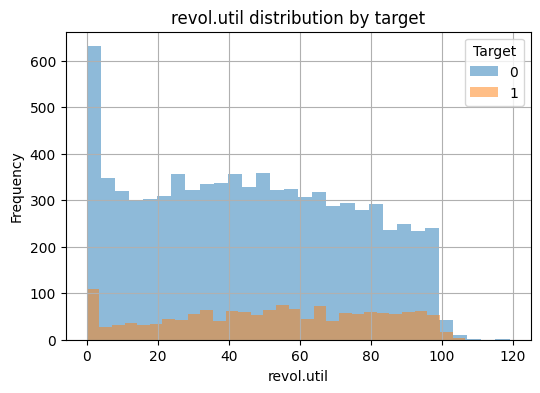

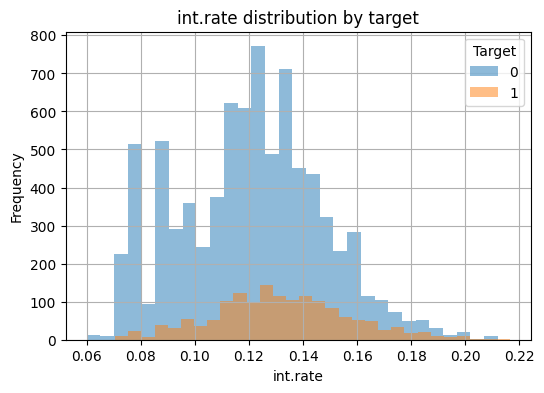

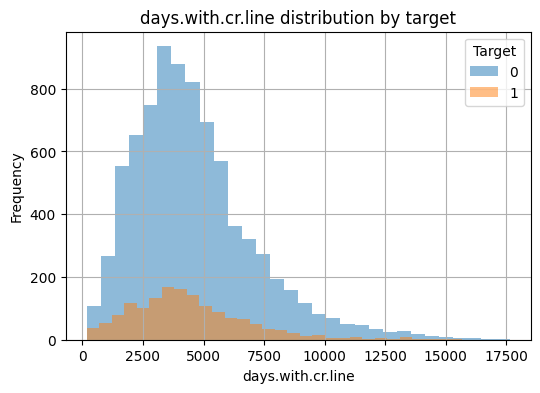

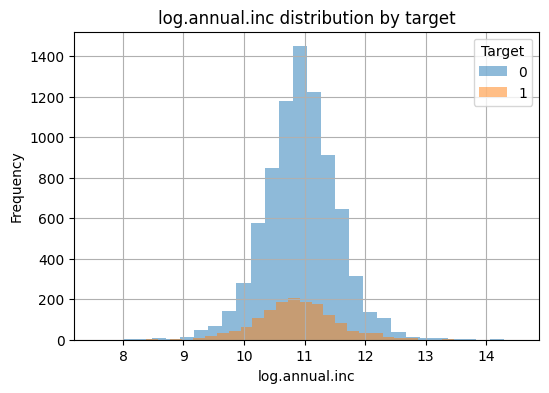

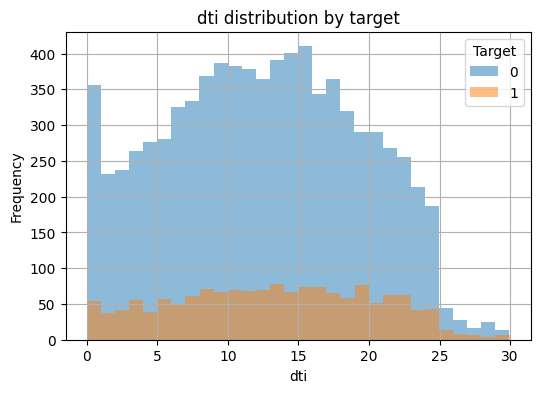

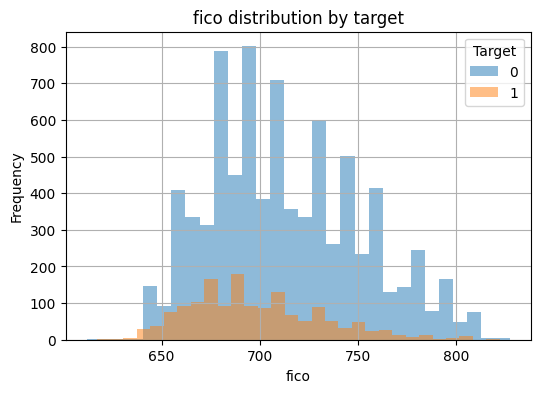

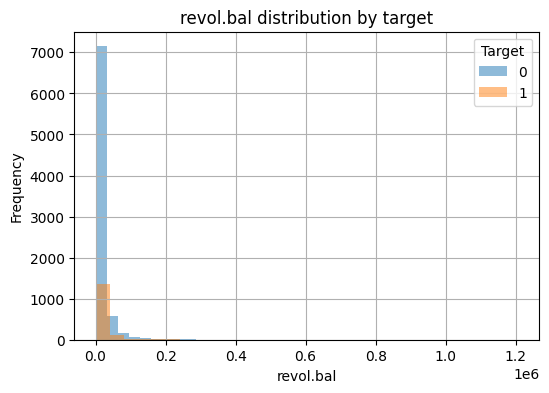

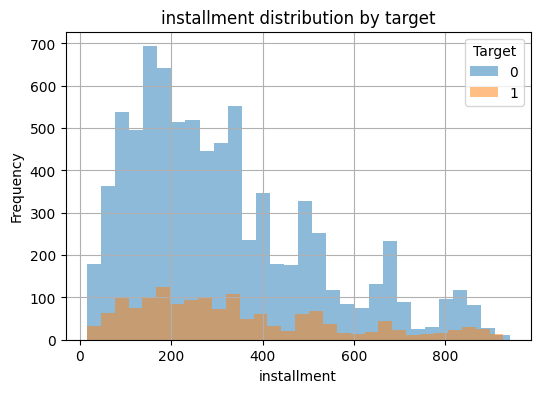

In [23]:
# List of features and target and their relation
target = 'not.fully.paid'
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    df[df[target] == 0][feature].hist(alpha=0.5, label='0', bins=30)
    df[df[target] == 1][feature].hist(alpha=0.5, label='1', bins=30)
    plt.title(f'{feature} distribution by target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Target')
    plt.show()

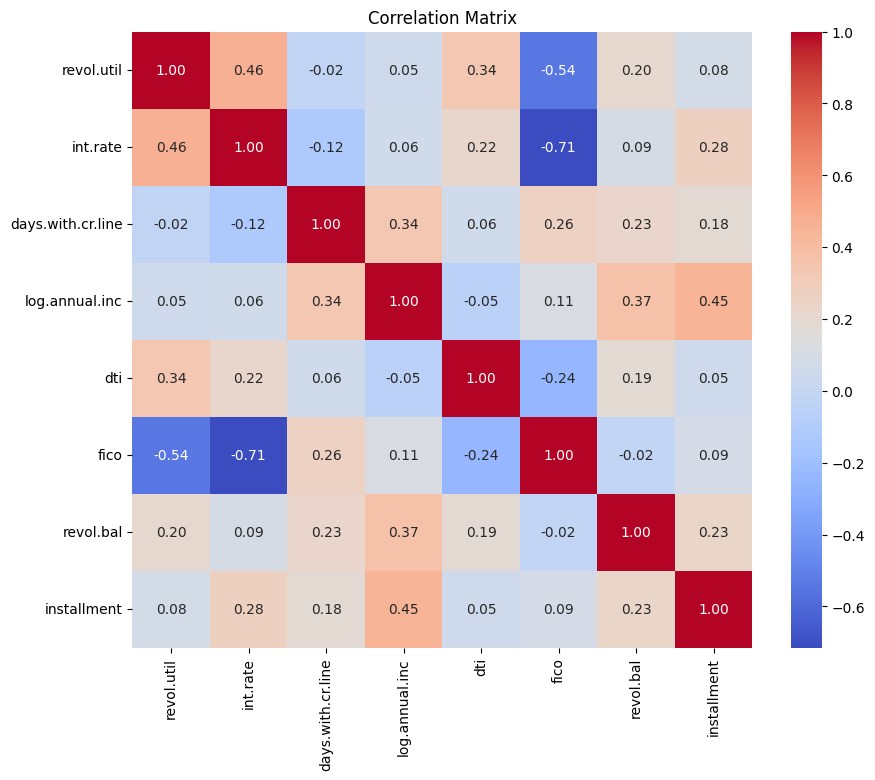

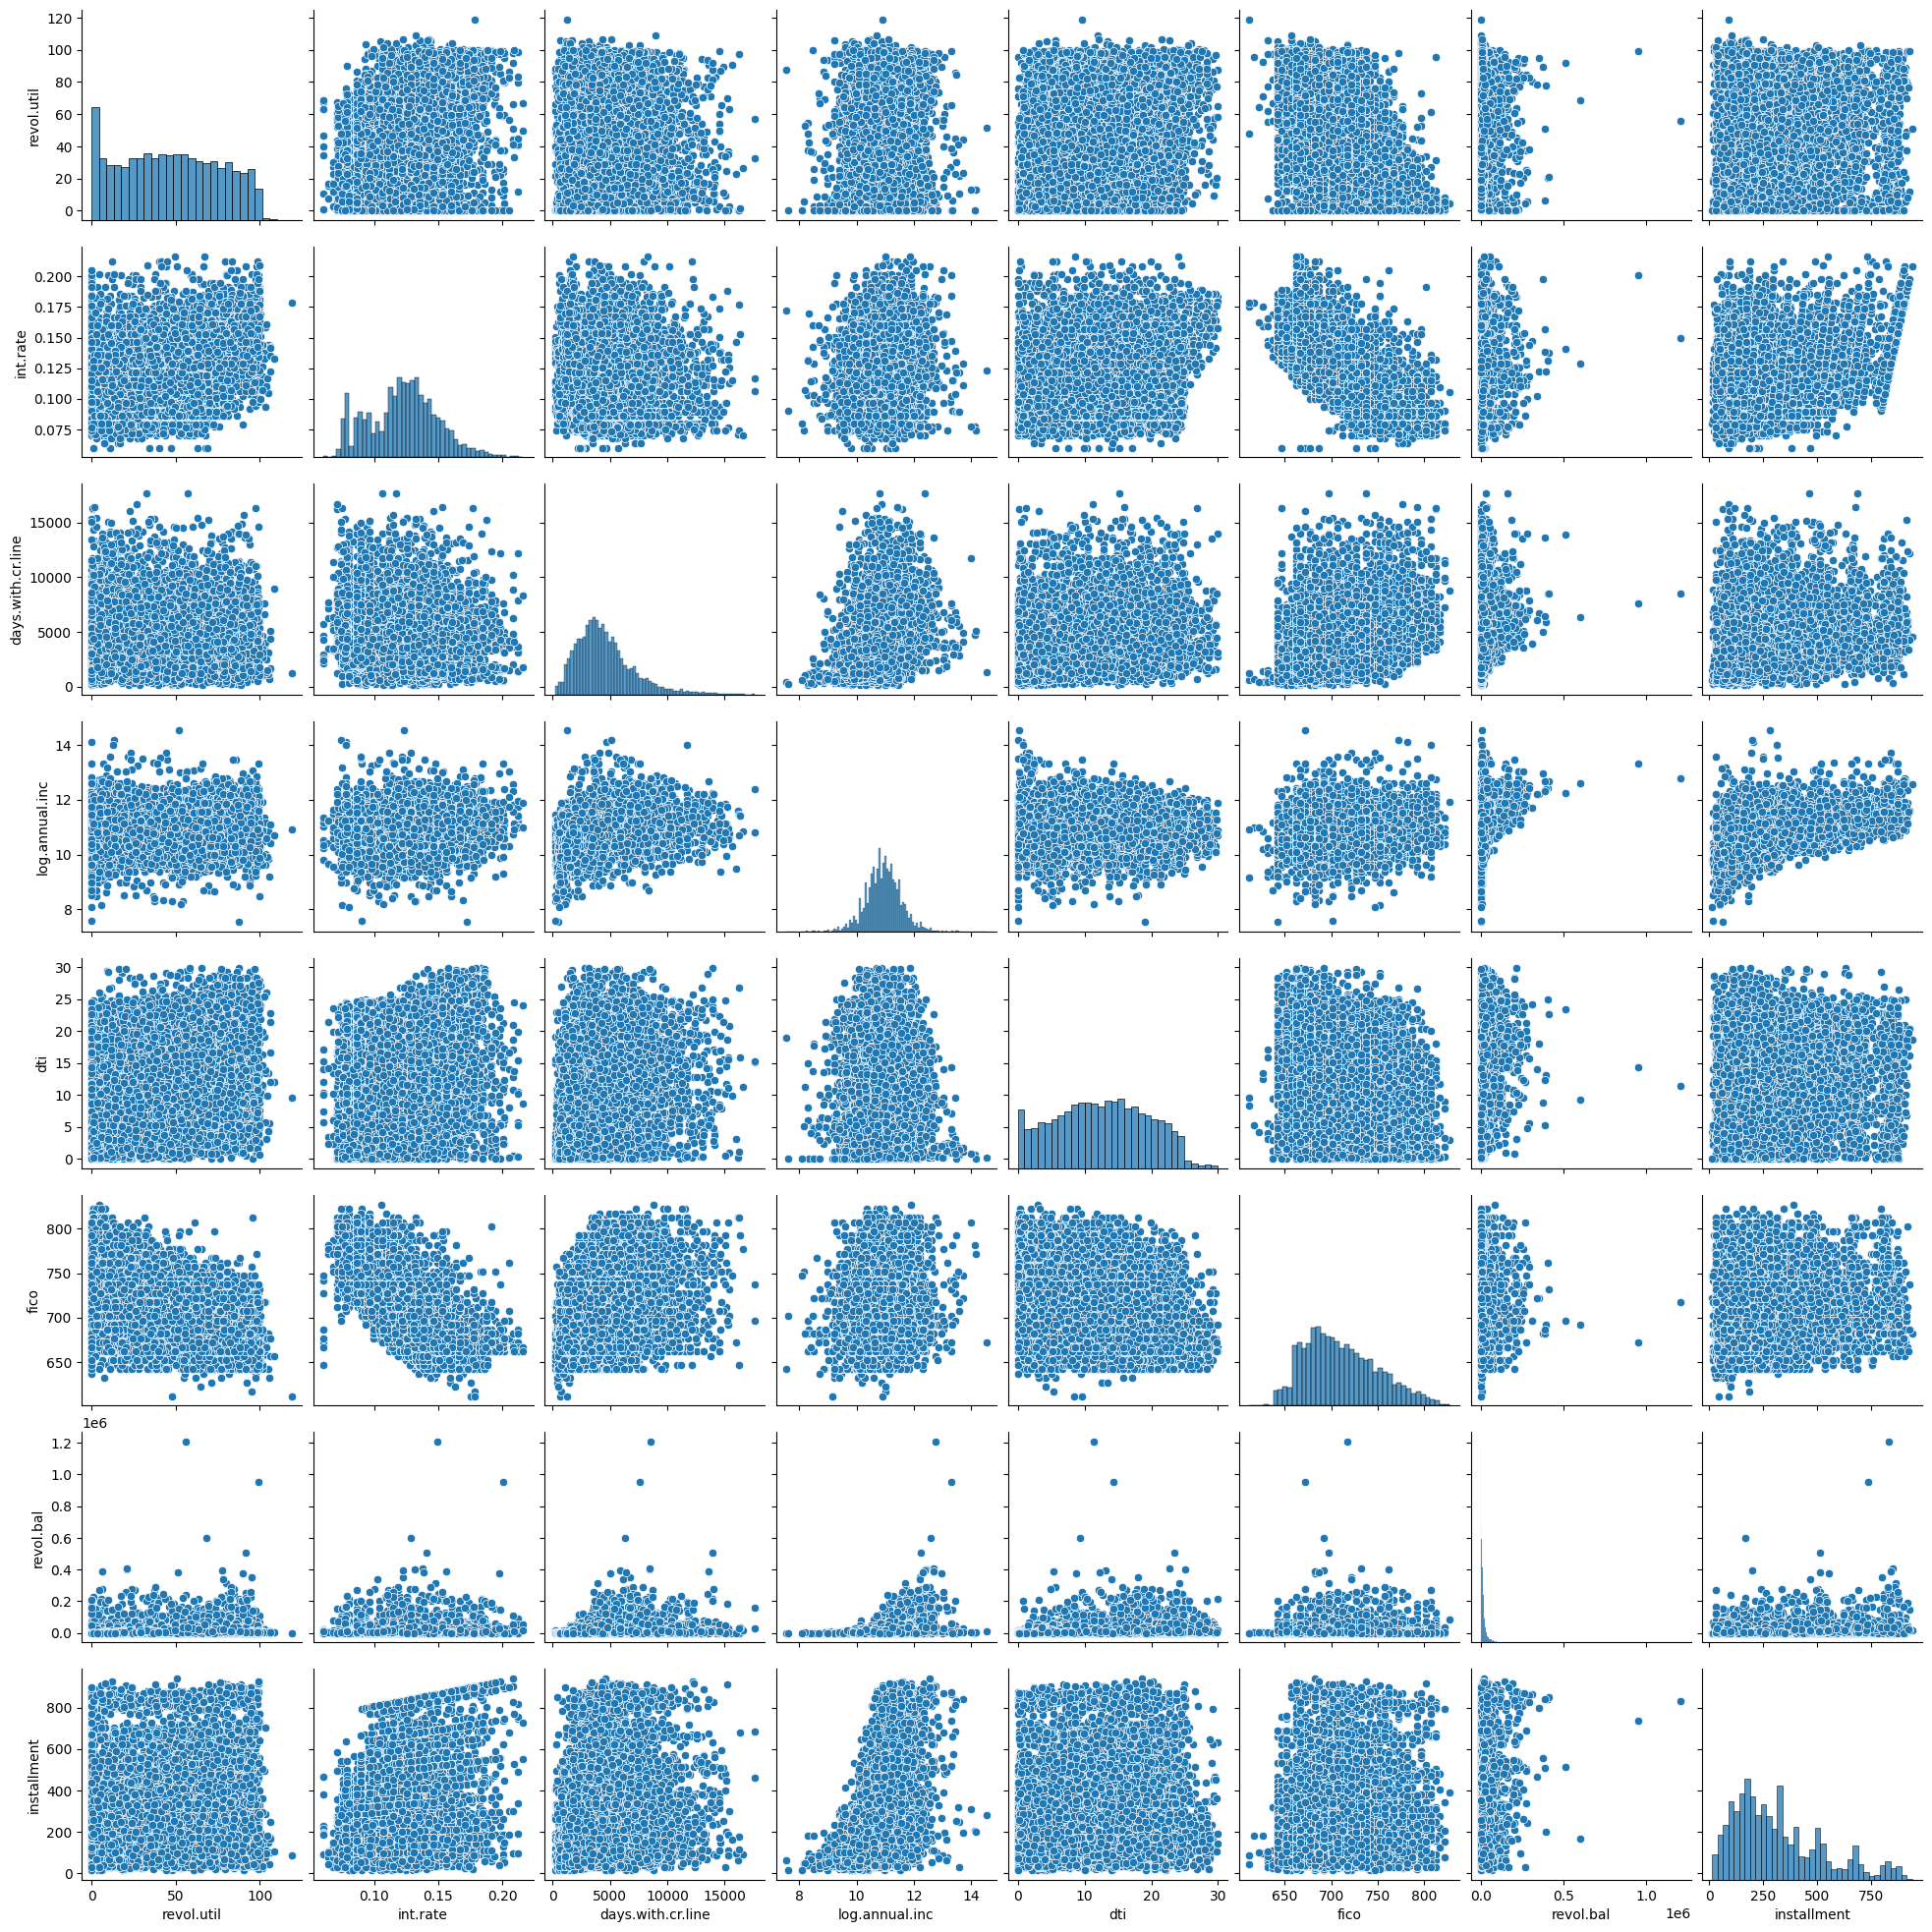

In [24]:
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df[numerical_features])
plt.show()